# Tutorial Implementasi Polynomial Regression

## Daftar Isi:
1. Pengenalan Polynomial Regression
2. Persiapan Data dan Library
3. Implementasi dengan Scikit-learn
4. Perbandingan Model dengan Derajat Berbeda
5. Overfitting dan Underfitting
6. Studi Kasus: Prediksi Data Non-Linear
7. Latihan Mandiri

## 1. Pengenalan Polynomial Regression

Polynomial Regression adalah perluasan dari Linear Regression yang memungkinkan kita untuk memodelkan hubungan non-linear antara variabel independen dan dependen. Model ini menggunakan polynomial dengan derajat tertentu untuk menghasilkan kurva yang lebih fleksibel.

### Rumus Dasar:
Untuk polynomial derajat n:
\[ y = b_0 + b_1x + b_2x^2 + b_3x^3 + ... + b_nx^n \]

dimana:
- y = variabel dependen (target)
- x = variabel independen (fitur)
- b_0, b_1, ..., b_n = koefisien model
- n = derajat polynomial

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed untuk reproducibility
np.random.seed(42)

# Untuk menampilkan plot di notebook
%matplotlib inline
plt.style.use('seaborn-v0_8')

## 2. Persiapan Data

Kita akan membuat dataset sintetis yang memiliki hubungan non-linear untuk mendemonstrasikan kegunaan Polynomial Regression. Data ini akan mengikuti pola kurva kuadrat dengan noise.

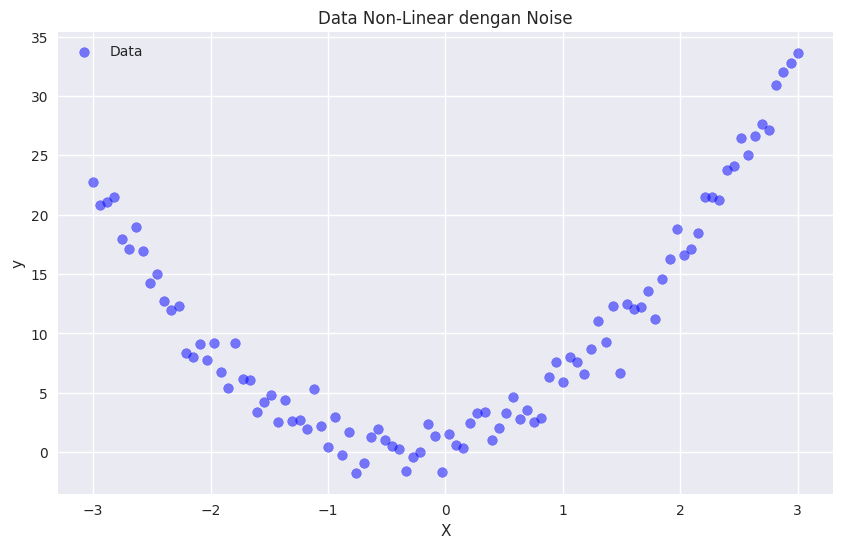

Bentuk data:
X shape: (100, 1)
y shape: (100, 1)


In [2]:
# Membuat data non-linear
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2*X + 3*X**2 + np.random.normal(0, 1.5, 100).reshape(-1, 1)

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Non-Linear dengan Noise')
plt.legend()
plt.grid(True)
plt.show()

print("Bentuk data:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

## 3. Implementasi Polynomial Regression

Kita akan membandingkan model dengan derajat polynomial yang berbeda untuk melihat bagaimana mereka menyesuaikan data:
1. Linear (derajat 1)
2. Kuadratik (derajat 2)
3. Kubik (derajat 3)
4. Derajat 4

Ini akan membantu kita memahami konsep underfitting dan overfitting.


Metrics untuk Polynomial Degree 1:
Mean Squared Error: 70.6308
R² Score: 0.1521

Metrics untuk Polynomial Degree 2:
Mean Squared Error: 1.8265
R² Score: 0.9781

Metrics untuk Polynomial Degree 3:
Mean Squared Error: 1.7378
R² Score: 0.9791

Metrics untuk Polynomial Degree 4:
Mean Squared Error: 1.7169
R² Score: 0.9794


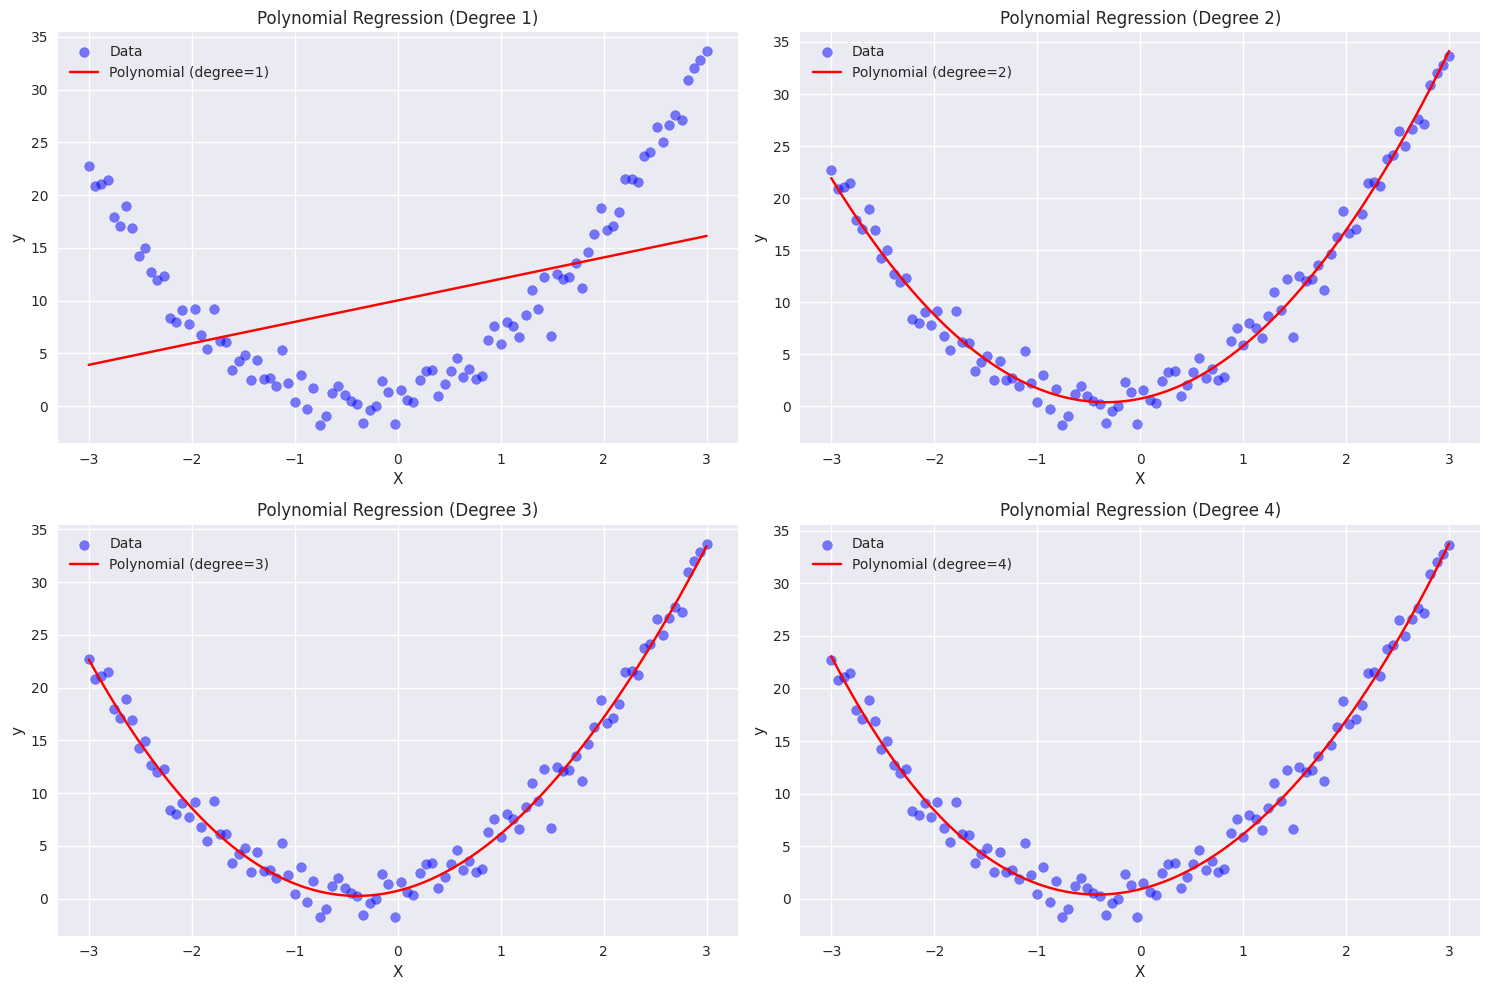

In [3]:
# Fungsi untuk membuat dan melatih model polynomial
def fit_polynomial_regression(X, y, degree):
    # Transform fitur ke bentuk polynomial
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    return poly_features, model

# Fungsi untuk plot hasil
def plot_polynomial_regression(X, y, poly_features, model, degree):
    # Membuat data untuk plotting
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Polynomial (degree={degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.grid(True)

# Membuat dan plot model untuk berbagai derajat
degrees = [1, 2, 3, 4]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 2, i)
    poly_features, model = fit_polynomial_regression(X, y, degree)
    plot_polynomial_regression(X, y, poly_features, model, degree)
    
    # Hitung metrics
    y_pred = model.predict(poly_features.transform(X))
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print(f"\nMetrics untuk Polynomial Degree {degree}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

plt.tight_layout()
plt.show()

## 4. Studi Kasus: Prediksi Pertumbuhan Tanaman

Dalam studi kasus ini, kita akan memprediksi tinggi tanaman berdasarkan waktu. Pertumbuhan tanaman sering mengikuti pola non-linear, sehingga Polynomial Regression sangat cocok untuk kasus ini.

Faktor yang mempengaruhi:
- Waktu (dalam hari)
- Tinggi tanaman (dalam cm)
- Faktor lingkungan (dimodelkan sebagai noise)

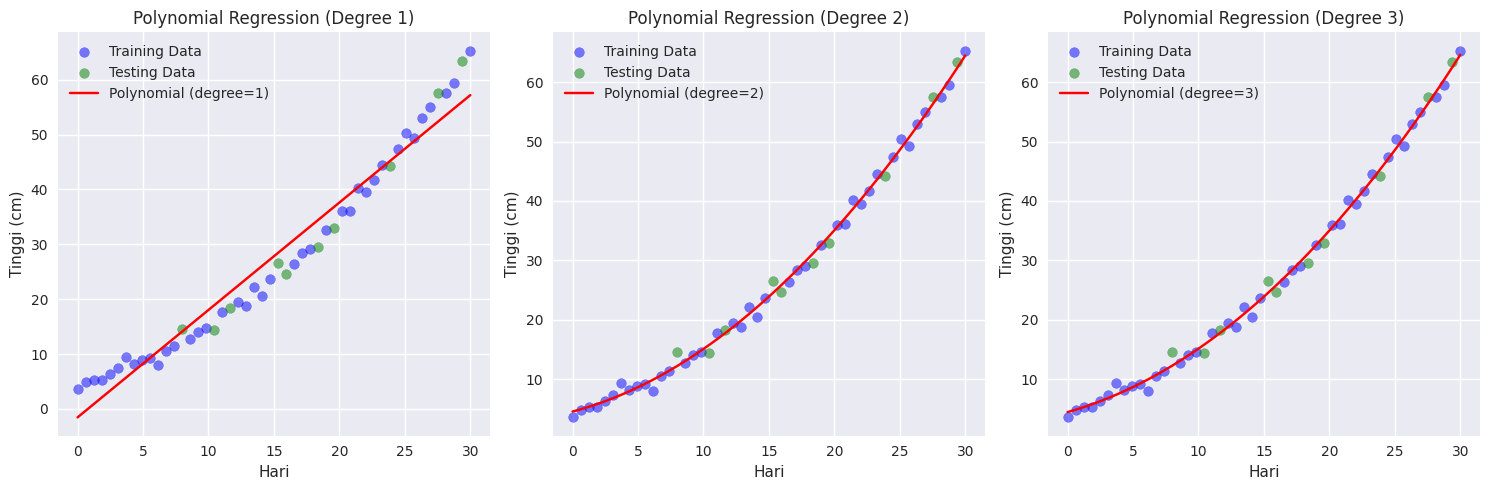


Hasil Evaluasi Model:

Polynomial Degree 1:
Training MSE: 11.2445
Testing MSE: 17.7595
R² Score: 0.9335

Polynomial Degree 2:
Training MSE: 0.7311
Testing MSE: 2.0916
R² Score: 0.9922

Polynomial Degree 3:
Training MSE: 0.7290
Testing MSE: 2.0167
R² Score: 0.9924

Prediksi tinggi tanaman pada hari ke-25: 48.63 cm


In [4]:
# Membuat data pertumbuhan tanaman
days = np.linspace(0, 30, 50).reshape(-1, 1)  # 30 hari pengamatan
height = 5 + 0.5*days + 0.05*days**2 + np.random.normal(0, 1, 50).reshape(-1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(days, height, test_size=0.2, random_state=42)

# Uji berbagai derajat polynomial
degrees = [1, 2, 3]
models = []
metrics = []

plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees, 1):
    # Fit model
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Prediksi
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    metrics.append({
        'degree': degree,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'r2': r2
    })
    
    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')
    
    # Plot prediction line
    X_plot = np.linspace(0, 30, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color='red', label=f'Polynomial (degree={degree})')
    
    plt.xlabel('Hari')
    plt.ylabel('Tinggi (cm)')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print metrics
print("\nHasil Evaluasi Model:")
for metric in metrics:
    print(f"\nPolynomial Degree {metric['degree']}:")
    print(f"Training MSE: {metric['train_mse']:.4f}")
    print(f"Testing MSE: {metric['test_mse']:.4f}")
    print(f"R² Score: {metric['r2']:.4f}")

# Prediksi tinggi tanaman pada hari ke-25
day_25 = np.array([[25]])
best_degree = 2  # Berdasarkan hasil evaluasi
poly_features = PolynomialFeatures(degree=best_degree)
X_pred = poly_features.fit_transform(day_25)
model = LinearRegression()
model.fit(poly_features.fit_transform(days), height)
height_pred = model.predict(X_pred)

print(f"\nPrediksi tinggi tanaman pada hari ke-25: {height_pred[0][0]:.2f} cm")

## 5. Latihan Mandiri

### Latihan 1: Prediksi Konsumsi Energi
Buat model untuk memprediksi konsumsi energi berdasarkan suhu udara. Hubungan antara suhu dan konsumsi energi biasanya non-linear (bentuk U).

Data yang diperlukan:
- Suhu udara (°C)
- Konsumsi energi (kWh)
- Minimal 100 data point

### Latihan 2: Analisis Performa Atlet
Modelkan hubungan antara:
- Waktu latihan (jam)
- Performa (skor)
- Faktor kelelahan (non-linear)

### Latihan 3: Prediksi Populasi Bakteri
Buat model pertumbuhan populasi bakteri:
- Waktu (jam)
- Jumlah bakteri
- Pertumbuhan mengikuti kurva sigmoid

### Tips Mengerjakan:
1. Mulai dengan membuat data sintetis yang masuk akal
2. Coba berbagai derajat polynomial (1-4)
3. Evaluasi model dengan metrics yang sesuai
4. Visualisasikan hasil dan interpretasikan
5. Hati-hati terhadap overfitting

### Bonus Challenge:
Tambahkan validasi silang (cross-validation) untuk memilih derajat polynomial terbaik.

## 6. Kesimpulan dan Best Practices

### Kesimpulan:
1. Polynomial Regression adalah perluasan dari Linear Regression untuk memodelkan hubungan non-linear
2. Semakin tinggi derajat polynomial, semakin fleksibel model
3. Perlu keseimbangan antara kompleksitas model dan generalisasi

### Best Practices:
1. **Preprocessing Data**:
   - Normalisasi fitur untuk stabilitas numerik
   - Handle outliers yang dapat mempengaruhi fitting

2. **Pemilihan Derajat Polynomial**:
   - Mulai dari derajat rendah
   - Gunakan validasi silang
   - Monitor overfitting

3. **Evaluasi Model**:
   - Gunakan multiple metrics (MSE, R², dll)
   - Bandingkan performa training vs testing
   - Visualisasikan prediksi

4. **Interpretasi**:
   - Pahami trade-off kompleksitas vs akurasi
   - Pertimbangkan interpretabilitas model
   - Validasi prediksi dengan domain knowledge

### Kapan Menggunakan Polynomial Regression:
- Data menunjukkan pola non-linear yang jelas
- Jumlah fitur tidak terlalu banyak
- Perlu interpretabilitas model
- Hubungan antar variabel dapat dimodelkan dengan polynomial

### Keterbatasan:
- Sensitif terhadap outliers
- Dapat mengalami overfitting pada derajat tinggi
- Komputasi berat untuk data dimensi tinggi
- Ekstrapolasi tidak reliable di luar range data training

Remember: "With great power comes great responsibility" - Gunakan derajat polynomial yang sesuai dengan kompleksitas masalah Anda! 🎯